In [36]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import optimize
import matplotlib.pyplot as plt

$$
P(x | \theta) \quad \textrm{Likelihood}
$$

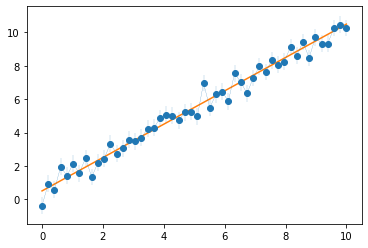

In [135]:
def line(x, m, b):
    return m*x + b

def gaussian(x, m, b, sigma):
    return 1 / np.sqrt(2 * np.pi * sigma**2) \
        * np.exp(-(x - line(x, m, b))**2/(2 * sigma**2))

y = line
x = np.linspace(0, 10)
m = 1
b = 0.5
sigma = 0.5

signal = y(x, m, b)
data = signal + np.random.randn(50) * sigma
plt.errorbar(x, data, yerr=sigma, marker='o', lw=0.2)
plt.plot(x, signal)

In [144]:
def loglikelihood(params):
    m, b = params
    return ((data - y(x, m, b))**2).sum() / sigma**2

result = optimize.minimize(loglikelihood, [0,0])
print(result)
result.x

      fun: -8.996133377302887e+20
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 64
      nit: 1
     njev: 16
   status: 0
  success: True
        x: array([-3.57354670e+08, -5.45425277e+07])


array([-3.57354670e+08, -5.45425277e+07])

c:\python37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
c:\python37\lib\site-packages\scipy\optimize\optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
c:\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


0.9987965403464029 0.15001823553173965


c:\python37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
c:\python37\lib\site-packages\scipy\optimize\optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
c:\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


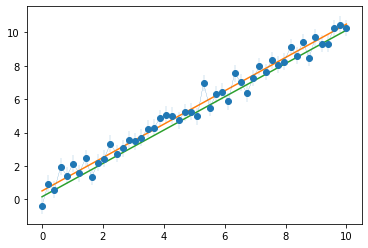

In [165]:
from scipy.stats import norm

m0 = 1
b0 = 0.5

def logp(params):
    m, b = params
    return - np.log(norm(loc=m0, scale=0.1).pdf(m)) \
           - np.log(norm(loc=b0, scale=0.1).pdf(b))

def logposterior(params):
    return - loglikelihood(params) - logp(params)

# lognormal priors
result_gaussian_prior = optimize.minimize(logposterior, [0, 0])
# print(result_gaussian_prior)
m_g, b_g = result_gaussian_prior.x
print(m_g, b_g)

plt.errorbar(x, data, yerr=sigma, marker='o', lw=0.2)
plt.plot(x, signal)
plt.plot(x, line(x, m_g, b_g))

c:\python37\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
c:\python37\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


[[           -inf            -inf            -inf ...            -inf
             -inf            -inf]
 [           -inf            -inf            -inf ...            -inf
             -inf            -inf]
 [           -inf            -inf            -inf ...            -inf
             -inf            -inf]
 ...
 [           -inf            -inf            -inf ... 103622.8242501
             -inf            -inf]
 [           -inf            -inf            -inf ... 121296.97529271
             -inf            -inf]
 [           -inf            -inf            -inf ...            -inf
             -inf            -inf]]


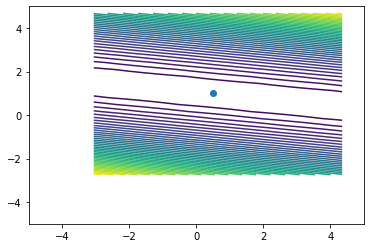

In [166]:
ms = np.linspace(-5, 5, 32)
bs = np.linspace(-5, 5, 32)

log_pdf = np.zeros((32, 32))

for i in range(32):
    for j in range(32):
        log_pdf[i,j] = logposterior((ms[i], bs[j]))

print(log_pdf)
plt.contour(ms, bs, log_pdf, 40)
plt.plot(b0, m0, 'o')

[[5220.95987726 5162.84228472 5105.14092527 ... 3704.54032827
  3658.49349535 3612.86289552]
 [4847.78100891 4791.74458182 4736.12438782 ... 3391.71525804
  3347.74959057 3304.2001562 ]
 [4488.61815279 4434.66289115 4381.1238626  ... 3092.90620004
  3051.02169803 3009.55342911]
 ...
 [  89.27366125   91.50986683   94.16230551 ...  323.11425793
   337.42122314  352.14442144]
 [ 122.55914763  126.87651867  131.61012279 ...  416.75354244
   433.1416731   449.94603685]
 [ 169.86064624  176.25918273  183.07395231 ...  524.40883918
   542.87813529  561.76366449]]


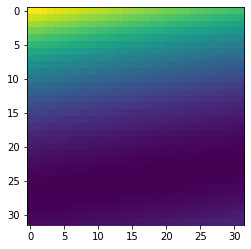

[-5.         -4.67741935 -4.35483871 -4.03225806 -3.70967742 -3.38709677
 -3.06451613 -2.74193548 -2.41935484 -2.09677419 -1.77419355 -1.4516129
 -1.12903226 -0.80645161 -0.48387097 -0.16129032  0.16129032  0.48387097
  0.80645161  1.12903226  1.4516129   1.77419355  2.09677419  2.41935484
  2.74193548  3.06451613  3.38709677  3.70967742  4.03225806  4.35483871
  4.67741935  5.        ]
[-5.         -4.67741935 -4.35483871 -4.03225806 -3.70967742 -3.38709677
 -3.06451613 -2.74193548 -2.41935484 -2.09677419 -1.77419355 -1.4516129
 -1.12903226 -0.80645161 -0.48387097 -0.16129032  0.16129032  0.48387097
  0.80645161  1.12903226  1.4516129   1.77419355  2.09677419  2.41935484
  2.74193548  3.06451613  3.38709677  3.70967742  4.03225806  4.35483871
  4.67741935  5.        ]
